In [158]:
%matplotlib inline
from delay_char import DlyLineDlog
import sys
import os
import numpy as np
import pandas as pd
import matplotlib

In [159]:
def data2df(lot_num, temp):
    dly = DlyLineDlog(os.path.join(".\\data\\Delay_line\\", lot_num, temp, "summary_" + temp + '.txt'), temp, lot_num)
    df_lst = dly.gen_df_lst()
    return  pd.DataFrame(df_lst)

In [160]:
lotnum = "RC01927M"
temp = '25C'
df = data2df(lotnum, temp)
df = df.append(data2df(lotnum, '105C'))
df = df.append(data2df(lotnum, '-5C'))
lotnum = "RC01928M"
df = df.append(data2df(lotnum, '25C'))
df = df.append(data2df(lotnum, '105C'))
df = df.append(data2df(lotnum, '-5C'))

lotnum = "RC01929M"
df = df.append(data2df(lotnum, '25C'))
df = df.append(data2df(lotnum, '105C'))
df = df.append(data2df(lotnum, '-5C'))

In [161]:
df.columns = ['Lot', 'Temp', 'Dev#', 'VDD', 'Test', 'Data0', 'Data1']

In [162]:
df = df[(df['Dev#'] != 9) | (df['Lot'] != 'RC01928M')]

In [163]:
# df[(df['Test'] == 'VOH') | (df['Test'] == 'VOL')]

In [164]:
df.loc[df.Test == 'Delay', 'Data1'] = df[df.Test == 'Delay'].Data1.astype(int)

In [165]:
# df_delay["Data1"] = df_delay['Data1'].convert_objects(convert_numeric=True)

In [166]:
df[(df['Test'] == 'IDD') & (df['Data0'] > 4.5)].head(5)

,Lot,Temp,Dev#,VDD,Test,Data0,Data1
2160,RC01927M,-5C,2,3.7,IDD,5.507,STATIC
2161,RC01927M,-5C,2,3.7,IDD,5.559,DYNAMIC
2162,RC01927M,-5C,2,3.6,IDD,5.421,STATIC
2163,RC01927M,-5C,2,3.6,IDD,5.431,DYNAMIC
2164,RC01927M,-5C,2,3.5,IDD,5.380,STATIC


In [167]:
df.loc[df.Test == 'Delay', 'Dly'] = df[df.Test == 'Delay'].apply(lambda x: (x['Data0'] * 1000 - int(x['Data1'])) / int(x['Data1']) * 100, axis=1)

In [168]:
df_dly = df[df.Test == 'Delay']

In [180]:
df_dly[df_dly['Data1'] < 8000]['Dly'].describe()

count    86400.000000
mean         0.962419
std          1.339775
min         -3.500000
25%          0.000000
50%          1.000000
75%          2.000000
max          4.500000
Name: Dly, dtype: float64

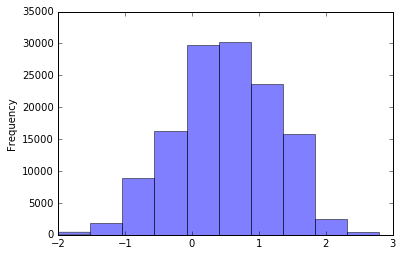

In [178]:
df_dly[df_dly['Data1'] > 8000]['Dly'].plot(kind='hist', alpha=0.5)

In [194]:
df_dly[df_dly['Data1'] >= 8000].Dly.describe()

count    131760.000000
mean          0.528639
std           0.741932
min          -2.000000
25%           0.000000
50%           0.597938
75%           1.000000
max           3.000000
Name: Dly, dtype: float64

In [198]:
df_dly[df_dly.index == [df_dly[(df_dly.Data1 >= 8000)].Dly.argmax()]]

,Lot,Temp,Dev#,VDD,Test,Data0,Data1,Dly
9128,RC01927M,25C,9,2.9,Delay,8.04,8000,0.5
9128,RC01927M,105C,10,2.9,Delay,8.08,8000,1.0
9128,RC01927M,-5C,11,2.9,Delay,8.08,8000,1.0
9128,RC01929M,25C,9,2.9,Delay,8.16,8000,2.0
9128,RC01929M,105C,9,2.9,Delay,8.24,8000,3.0
9128,RC01929M,-5C,9,2.9,Delay,8.16,8000,2.0


In [199]:
df_dly[df_dly.index == [df_dly[(df_dly.Data1 < 8000)].Dly.argmax()]]

,Lot,Temp,Dev#,VDD,Test,Data0,Data1,Dly
14177,RC01927M,25C,14,3.0,Delay,2.00,2000,0.0
14177,RC01927M,105C,15,3.0,Delay,2.02,2000,1.0
14177,RC01927M,-5C,16,3.0,Delay,2.00,2000,0.0
14177,RC01928M,25C,16,3.0,Delay,2.07,2000,3.5
14177,RC01928M,105C,14,3.0,Delay,2.09,2000,4.5
14177,RC01928M,-5C,14,3.0,Delay,2.08,2000,4.0
14177,RC01929M,25C,14,3.0,Delay,2.01,2000,0.5
14177,RC01929M,105C,14,3.0,Delay,2.01,2000,0.5
14177,RC01929M,-5C,14,3.0,Delay,2.01,2000,0.5
